<a href="https://colab.research.google.com/github/naufalihsan/tesseract/blob/master/OCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Optical Character Recognition Using Tesseract

### Contributor
- Naufal Ihsan Pratama

In [0]:
!sudo apt install tesseract-ocr
!pip install pytesseract
!sudo apt-get install imagemagick

#### Import Library

In [0]:
import pytesseract
import shutil
import os
import random
try:
 from PIL import Image
except ImportError:
 import Image

In [6]:
from google.colab import files
uploaded = files.upload()

Saving ktp_example.jpeg to ktp_example.jpeg


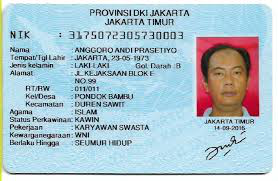

In [21]:
ktp = Image.open('ktp_example.jpeg')
ktp

#### Initial Reading Image

In [22]:
extractedInformation = pytesseract.image_to_string(ktp)
print(extractedInformation)

PROVINSIDKIINKARTA

ees
wre = 34750723057 0003
Sea ae
a

SADE" SPYaun enue on


In [9]:
uploaded = files.upload()

Saving ktp_example2.jpg to ktp_example2.jpg


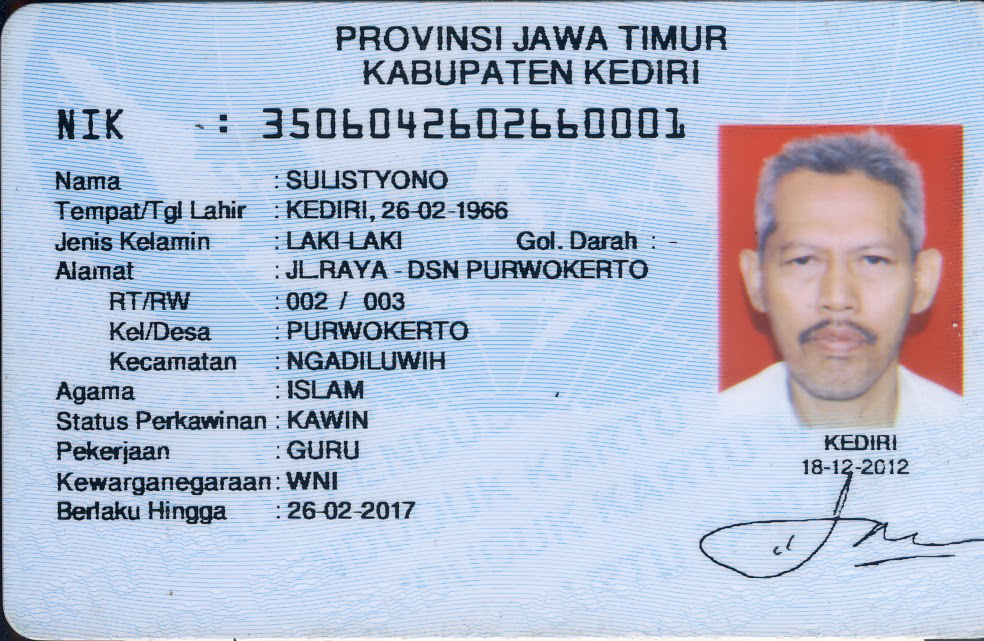

In [23]:
ktp2 = Image.open('ktp_example2.jpg')
ktp2

In [24]:
extractedInformation = pytesseract.image_to_string(ktp2)
print(extractedInformation)

Pekerjaan

Berlaku Hingga

Ee

 

 

Status Perkawinan : KAWIN

PROVINSI! JAWA TIMUR
KABUPATEN KEDIRi

SS5SO0L04eb02bbO001

:SULISTYONO

= KEDIRI, 26-02-1966

-LAK-LAKI Gol. Darah : —
: JLRAYA -DSN PURWOKERTO
+002 7-003

: PURWOKERTO

: NGADILUWIH

ISLAM

 

: GURU ~ KEDIRI
18-12.

Kewarganegaraan: WNI

7
: 26-02-2017

ts


#### Preprocessing for Tesseract

In [0]:
from google.colab.patches import cv2_imshow

import cv2
import numpy as np

ktp2 = cv2.imread('ktp_example2.jpg')

# get grayscale image
def get_grayscale(image):
  return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
  return cv2.medianBlur(image,5)
 
#thresholding
def thresholding(image):
  return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
  kernel = np.ones((5,5),np.uint8)
  return cv2.dilate(image, kernel, iterations = 1)
    
#erosion
def erode(image):
  kernel = np.ones((5,5),np.uint8)
  return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
  kernel = np.ones((5,5),np.uint8)
  return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
  return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
  coords = np.column_stack(np.where(image > 0))
  angle = cv2.minAreaRect(coords)[-1]
  if angle < -45:
    angle = -(90 + angle)
  else:
    angle = -angle
  (h, w) = image.shape[:2]
  center = (w // 2, h // 2)
  M = cv2.getRotationMatrix2D(center, angle, 1.0)
  rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
  return rotated

#template matching
def match_template(image, template):
  return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED) 

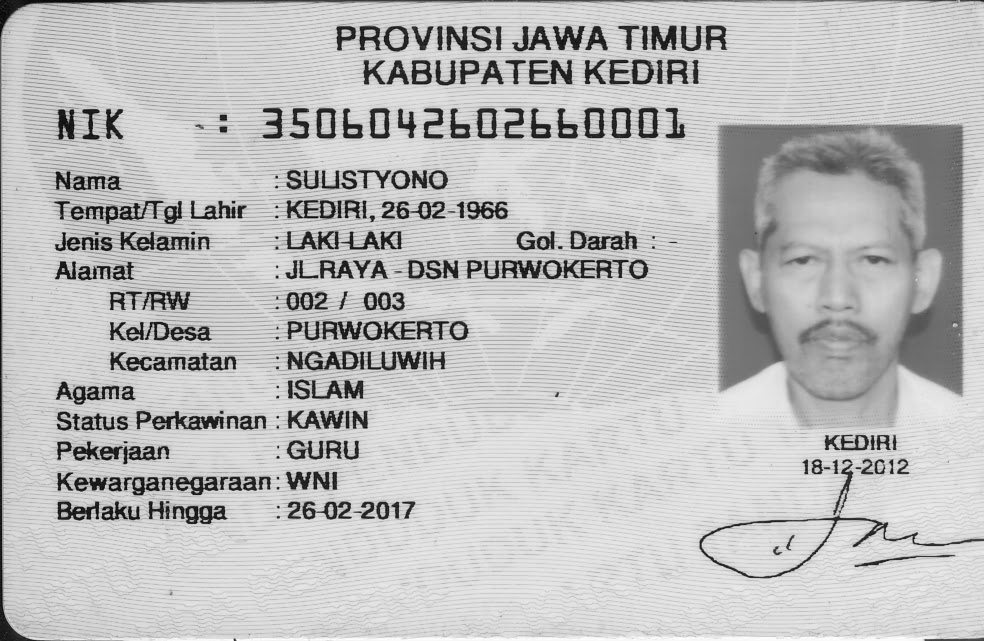

In [42]:
ktp2 = get_grayscale(ktp2)
cv2_imshow(ktp2)

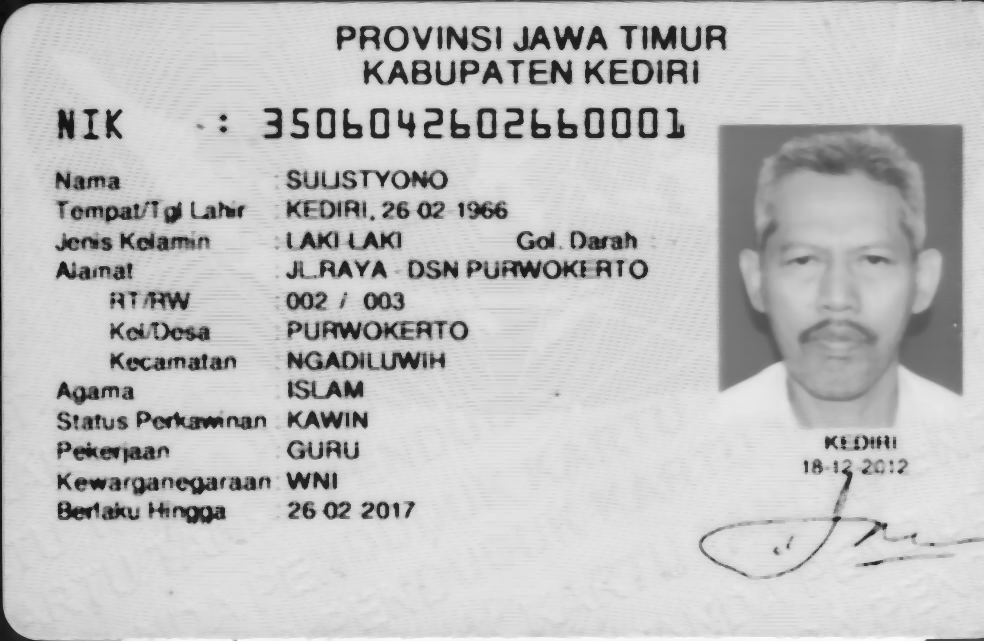

In [43]:
ktp2 = remove_noise(ktp2)
cv2_imshow(ktp2)

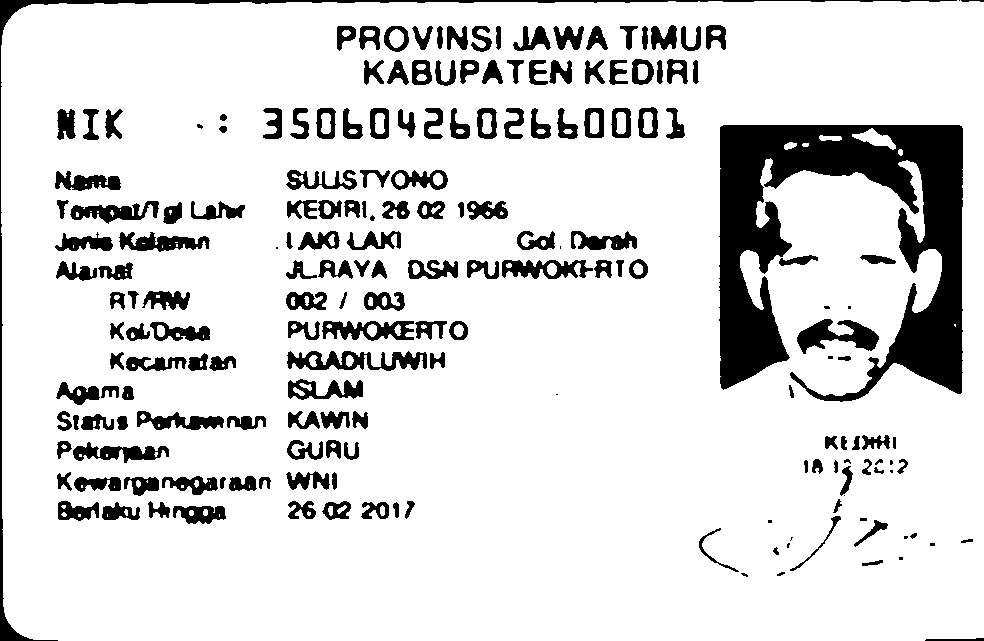

In [44]:
ktp2 = thresholding(ktp2)
cv2_imshow(ktp2)

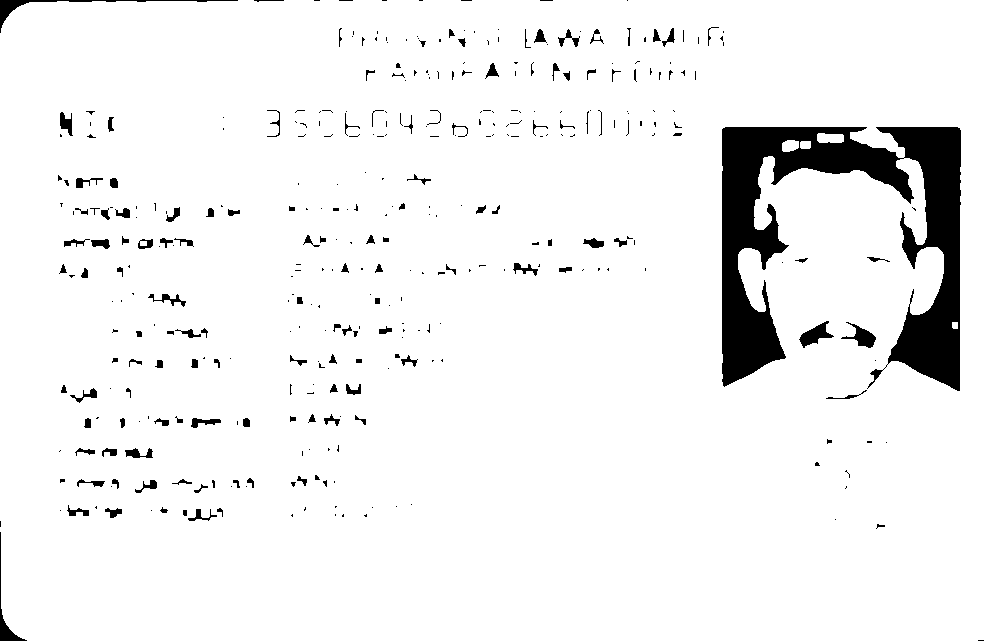

In [45]:
ktp2 = dilate(ktp2)
cv2_imshow(ktp2)

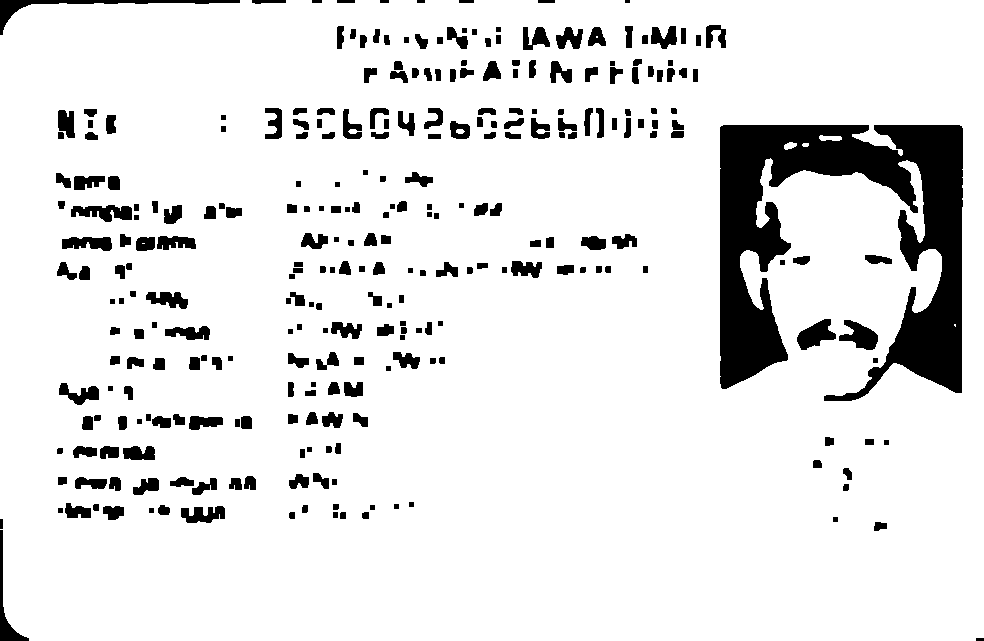

In [46]:
ktp2 = erode(ktp2)
cv2_imshow(ktp2)